# Estimate betas

# hand-picked hard case Gillespie sims plot

In [13]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp

import pickle
import os
import sys
sys.path.append('../src/')
sys.path.append('../scripts/')

from solve_kolmogorov import *
from simulate_gillespie import *
from estimate_total_rates import *

from higher_order_structures import Complete
from scipy.special import comb

# Setup

In [ ]:
test_name = "demos"

N = 1000
g = Complete(N)
g.print()

I0 = 50
nsims = 20

time_max = 20.0
mu = 1.0

	Complete on 1000 nodes with 166666500 edges.



In [3]:
# checked the quasi steady states
points_for_750_regime = [
    (1.1, 8),     # low beta1, high beta2
    (2.4, 4.4),   # mid beta1, mid beta2
    (3.6, 1)      # high beta1, low beta2
]

In [4]:
pair_num = 0
beta1_scaled, beta2_scaled = points_for_750_regime[pair_num]
beta1_scaled, beta2_scaled

(1.1, 8)

In [ ]:
beta1 = beta1_scaled / N       # pairwise infection rate
beta2 = beta2_scaled / (N**2)  # hyperedge contagion rate
beta1, beta2

break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max


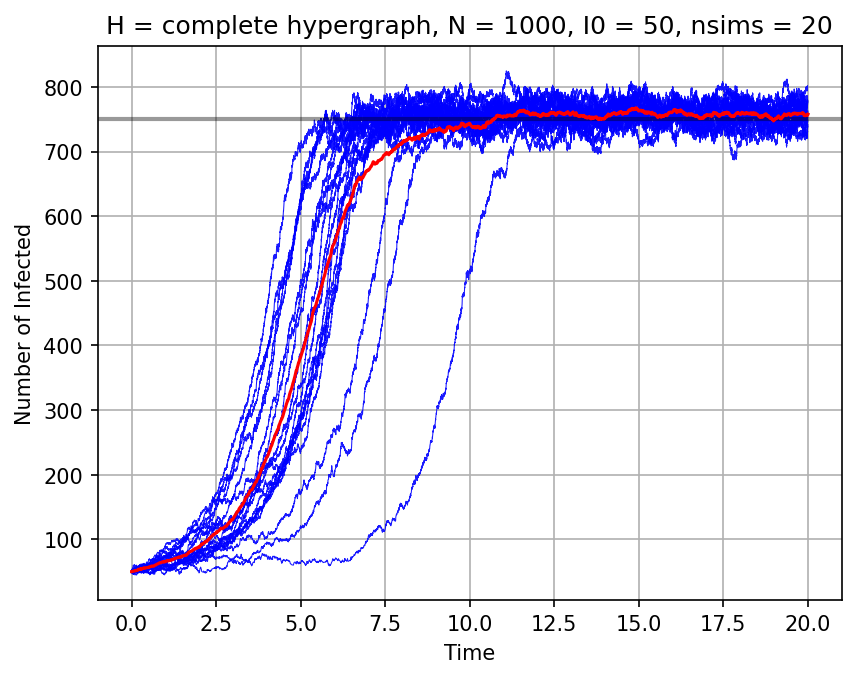

In [6]:
## --- Run Gillespie ---
# I0_gillespie = I0 # TODO: go over the range when necessary
# initial_infections = list(range(I0_gillespie))
X_sims = []
for _ in range(nsims):
    X_t = gillespie_sim_complete(N, beta1, beta2, mu, I0, time_max)
    X_sims.append(X_t)

# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

avg_curve, times = get_average(X_sims, time_max, nsims, delta_t = 0.01)

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.plot(times, avg_curve, "red")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = complete hypergraph, N = {N}, I0 = {I0}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/{test_name}/gillespie-sims_{pair_num}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory